<a href="https://colab.research.google.com/github/Philocreation/My_Deep_learning/blob/main/TIme_series_analysis/Bitcoin_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기 

In [ ]:
!unzip /content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv.zip

Archive:  /content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv.zip
replace bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
last_quantile = 0
null_counts = []
for q in np.arange(0, 1.0, 0.01):
    current_quantile = df.Timestamp.quantile(q)
    null_count = df[(df.Timestamp>=last_quantile) & (df.Timestamp<current_quantile)].Open.isnull().sum()
    null_counts.append(null_count)
    last_quantile = current_quantile



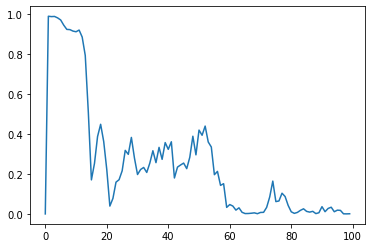

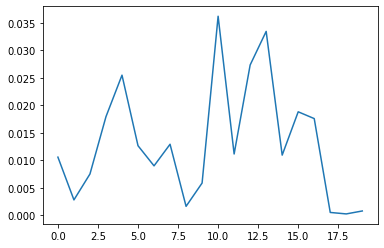

In [ ]:
null_counts = np.array(null_counts)
plt.plot(null_counts/len(df)*100.)
plt.show()

plt.plot(null_counts[80:]/len(df)*100.)
plt.show()

# 결측치 처리 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 248.1 MB


# 정렬 순서 확인 

In [ ]:
df.sort_values(by=["Timestamp"])

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
sorted_index = df.sort_values(by=["Timestamp"]).index

In [ ]:
print(sorted_index)
print(sorted_index - df.index)
print(sum(sorted_index - df.index))

Int64Index([      0,     478,     547,     548,    1224,    1896,    2333,
               3612,    4553,    4710,
            ...
            4857366, 4857367, 4857369, 4857370, 4857371, 4857372, 4857373,
            4857374, 4857375, 4857376],
           dtype='int64', length=3613769)
Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=3613769)
0


In [ ]:
df.drop(columns=["Timestamp", "Volume_(Currency)"], inplace=True)

Open


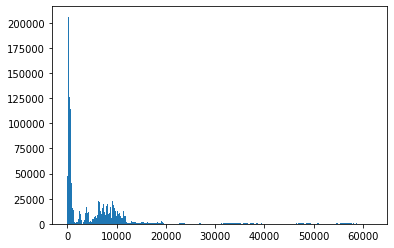

High


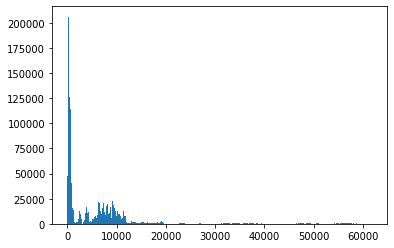

Low


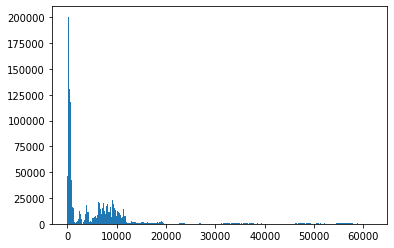

Close


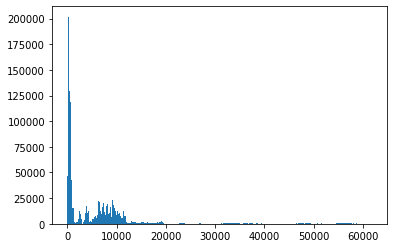

Volume_(BTC)


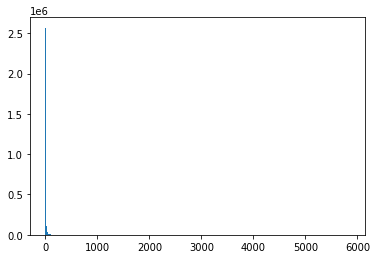

Weighted_Price


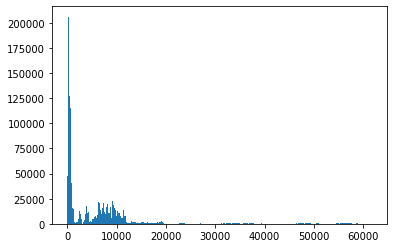

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

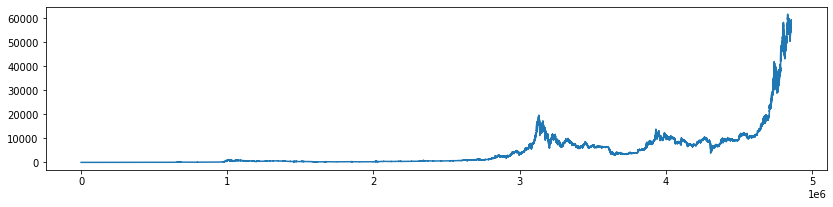

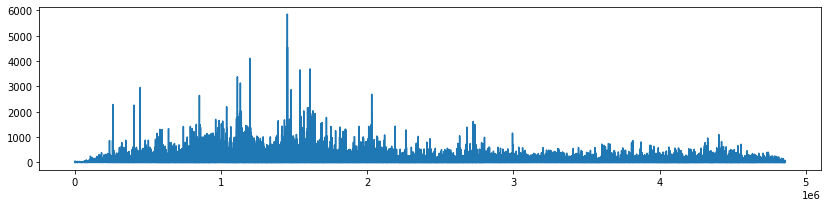

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,0])
plt.show()

plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,4])
plt.show()


In [ ]:
raw_data = df.to_numpy()
print(raw_data.shape)

(3613769, 6)


In [ ]:
print(raw_data[:5])

[[ 4.39        4.39        4.39        4.39        0.45558087  4.39      ]
 [ 4.39        4.39        4.39        4.39       48.          4.39      ]
 [ 4.5         4.57        4.5         4.57       37.86229723  4.5264115 ]
 [ 4.58        4.58        4.58        4.58        9.          4.58      ]
 [ 4.58        4.58        4.58        4.58        1.502       4.58      ]]


# 모든 컬럼 로그 처리


In [ ]:
df = np.log(df+1)

Open


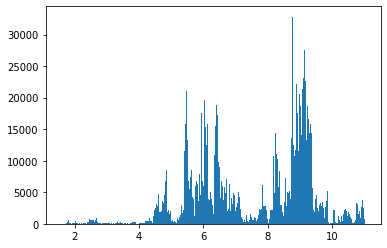

High


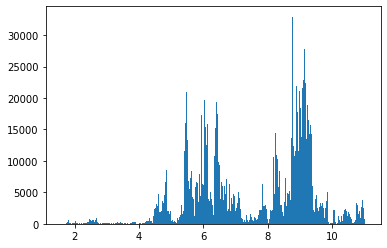

Low


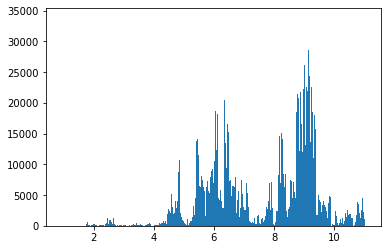

Close


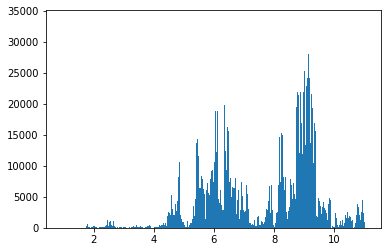

Volume_(BTC)


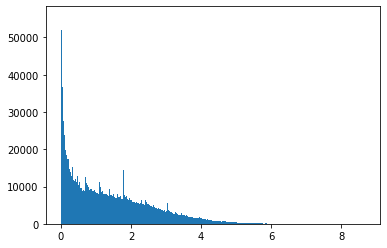

Weighted_Price


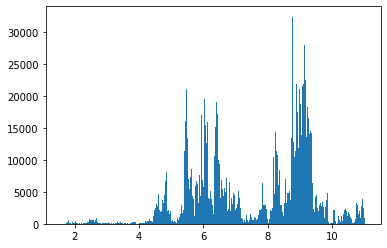

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

# normalize

In [ ]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[61763.56      61781.83      61673.55      61781.8        5853.8521659
 61716.205341 ]
[3.8 3.8 1.5 1.5 0.  3.8]


In [ ]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[9.55314593e-06 9.55032072e-06 4.68607740e-05 4.67786657e-05
  7.78258243e-05 9.56047648e-06]
 [9.55314593e-06 9.55032072e-06 4.68607740e-05 4.67786657e-05
  8.19972877e-03 9.56047648e-06]
 [1.13342409e-05 1.24639779e-05 4.86444021e-05 4.96922158e-05
  6.46792850e-03 1.17709153e-05]
 [1.26295828e-05 1.26258477e-05 4.99415862e-05 4.98540797e-05
  1.53744914e-03 1.26392740e-05]
 [1.26295828e-05 1.26258477e-05 4.99415862e-05 4.98540797e-05
  2.56583179e-04 1.26392740e-05]]


In [ ]:
preprocessed = normalized

# 파라미터 설정

In [ ]:
SEQUENCE_LENGTH = 16 * 60
OFFSET = 16 * 60
BATCH_SIZE = 32
SAMPLING_COUNT = 10000

# by Data Sampling

In [ ]:
numbers = preprocessed

In [ ]:
raw_x = []
raw_y = []

for j in range(SAMPLING_COUNT):
  i = np.random.randint(len(numbers)-SEQUENCE_LENGTH-OFFSET)
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9




In [ ]:
print(raw_x[0])
print(raw_y[0])
print()
print(raw_x[1])
print(raw_y[1])

[[4.62016044e-03 4.61879409e-03 4.66402528e-03 4.65585308e-03
  7.50085393e-05 4.62370569e-03]
 [4.62339880e-03 4.62203149e-03 4.66726824e-03 4.65909036e-03
  9.07530776e-05 4.62694653e-03]
 [4.62080811e-03 4.62089840e-03 4.66418742e-03 4.65795731e-03
  3.84549486e-03 4.62395003e-03]
 ...
 [4.60186374e-03 4.60713946e-03 4.64570255e-03 4.64419888e-03
  3.75541271e-04 4.60765720e-03]
 [4.60947387e-03 4.60811068e-03 4.65332351e-03 4.64517006e-03
  1.70827683e-04 4.61301092e-03]
 [4.60882620e-03 4.60956751e-03 4.65267492e-03 4.64662684e-03
  9.83848703e-04 4.61294028e-03]]
[4.73674120e-03 4.73534038e-03 4.77931251e-03 4.77239508e-03
 2.18222029e-05 4.74004941e-03]

[[1.76111921e-01 1.76086385e-01 1.76264288e-01 1.75955442e-01
  4.32799211e-05 1.76190587e-01]
 [1.75966519e-01 1.76134623e-01 1.76254073e-01 1.76165380e-01
  1.97524720e-03 1.76241118e-01]
 [1.76217168e-01 1.76197428e-01 1.76381521e-01 1.76161333e-01
  1.59060403e-03 1.76318511e-01]
 ...
 [1.76714579e-01 1.76662318e-01 1.769564

In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)

(10000, 960, 6)
(10000, 6)
Training Data:
(9000, 960, 6)
(9000, 6)
Test Data:
(1000, 960, 6)
(1000, 6)


train_x[0]
 [[1.26718433e-01 1.26760436e-01 1.26915353e-01 1.26793007e-01
  5.83782645e-04 1.26808639e-01]
 [1.26697869e-01 1.26660400e-01 1.26642620e-01 1.26587925e-01
  2.79357686e-03 1.26607722e-01]
 [1.26581289e-01 1.26572181e-01 1.26664672e-01 1.26543089e-01
  3.86650957e-04 1.26595254e-01]
 ...
 [1.27654803e-01 1.27743309e-01 1.27873648e-01 1.27775844e-01
  3.19474979e-05 1.27821024e-01]
 [1.27730581e-01 1.27692806e-01 1.27949533e-01 1.27725343e-01
  6.00577176e-06 1.27828594e-01]
 [1.27730581e-01 1.27692806e-01 1.27908996e-01 1.27684877e-01
  2.88842074e-05 1.27791876e-01]]

train_y[0]
 [1.24152523e-01 1.24184439e-01 1.24271692e-01 1.24161100e-01
 1.78916732e-05 1.24288996e-01]


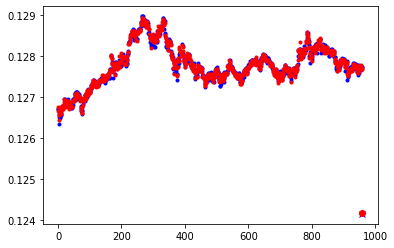

In [ ]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               69120     
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                                 
Total params: 69,894
Trainable params: 69,894
Non-trainable params: 0
_________________________________________________________________


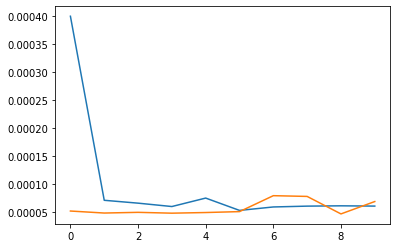

32/32 [==============================] - 1s 19ms/step - loss: 4.8188e-05 - mape: 2629.5476
loss= 4.818821616936475e-05
mape= 2629.547607421875


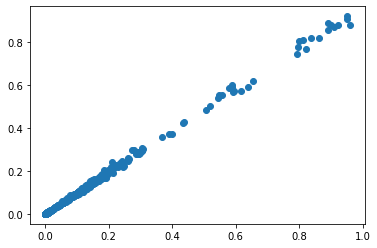

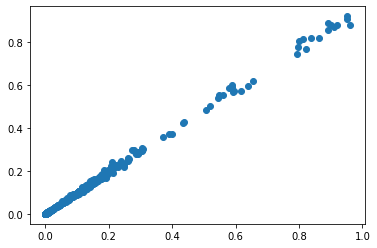

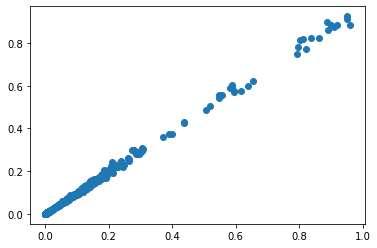

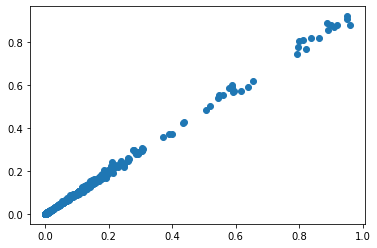

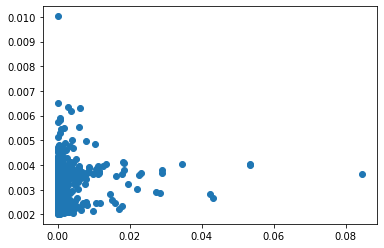

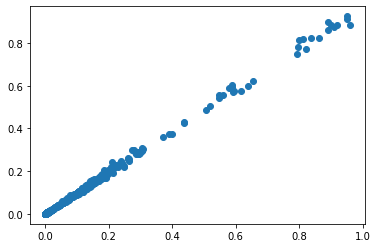

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

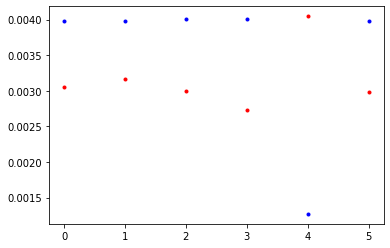

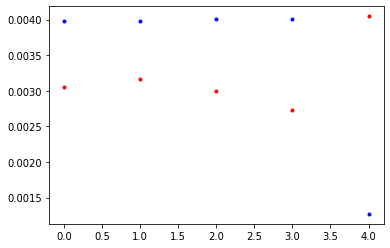

In [ ]:
plt.plot(test_y[0], 'b.')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'b.')
plt.plot(y_[0,:-1], 'r.')
plt.show()